In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
%matplotlib inline

A = [[-5.20518673, -6.20158042, -4.7723176,  -5.74887241, -3.8981963, -3.95267686, -4.07821104, -4.47283431],
     [-2.52572601, -3.4744284,  -2.65583428, -4.03933518, -3.66100228, -5.56220837,  -6.00542139, -7.01237211],
     [-4.72580218, -4.29470332, -3.52243655, -4.3630043,  -2.97272325, -3.07085756,  -3.72198223, -4.0564502 ]]

X = []
for i in range(3):
    Ax = []
    for j in range(8):
        Ax.append(10**A[i][j])
    X.append(Ax)

Y_log =  [-0.11, -0.93, -0.28, -1.48, -0.87, -0.86, -1.36, -1.88 ] #Honda star data
Y = [10**num for num in Y_log]

YError_log = [0.14, 0.20, 0.15, 0.14, 0.19, 0.2, 0.21, 0.2]
YError = np.array([(10**YError_log[i]-1)*Y[i] for i in range(8)])

X = pd.DataFrame(X)
y = pd.DataFrame(Y)
reg = LinearRegression(positive = True, fit_intercept = False).fit(X.T, y, sample_weight= 1/YError  )                              # Fitting
y_pred = reg.predict(X.T)                                           # Predicting

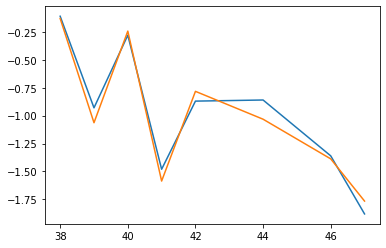

In [3]:
Z = [38, 39, 40, 41, 42, 44, 46, 47]
plt.plot(Z, np.log10(Y))
plt.plot(Z, np.log10(y_pred.reshape(-1)))

In [4]:
reg.coef_/np.sum(reg.coef_)
# reg.intercept_[0])   # Coefficients

array([[0.52556446, 0.37769496, 0.09674059]])

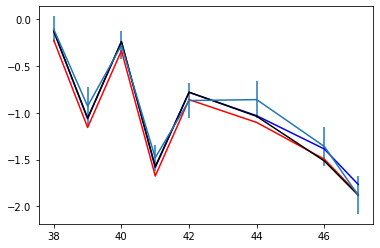

In [5]:
yLR = [reg.coef_[0][0]*10**A[0][i] + reg.coef_[0][1]*10**A[1][i] + reg.coef_[0][2]*10**A[2][i] for i in range(8)]
yTh = [171.13*10**A[0][i] + 248.12*10**A[1][i] + 84.44*10**A[2][i] for i in range(8)]
yMC = [0.485*10**A[0][i] + 0.395*10**A[1][i] + 0.120*10**A[2][i] for i in range(8)]

Z = [38, 39, 40, 41, 42, 44, 46, 47]
plt.errorbar(Z, np.log10(Y), YError_log)

plt.plot(Z, 2.7 + np.log10(yMC), c= 'red')
plt.plot(Z, np.log10(yLR), c = 'Blue')
plt.plot(Z, np.log10(yTh), c = 'Black')

In [72]:
# Table with good fits to weak r-process star

# 2 trajectory combinations

import numpy as np
import pandas as pd

# load dict of arrays
dict_data = np.load('conditions-2.npz')
# extract the first array
choices = dict_data['arr_0']
coeffs = dict_data['arr_1']
score = dict_data['arr_2']

data = []
for i in range(len(choices)):    
    data.append( np.append(np.array([choices[i]+1, coeffs[i]/np.sum(coeffs[i])]).reshape(-1), score[i]) )
data = np.asarray(data).reshape(len(choices),5)

data2traj = pd.DataFrame(data)
data2traj[data2traj[4] < 1]

,0,1,2,3,4
0,2.0,24.0,0.318681,0.681319,0.589104
1,24.0,33.0,0.274082,0.725918,0.695675
2,25.0,33.0,0.419253,0.580747,0.701124
3,2.0,8.0,0.287914,0.712086,0.710086
4,2.0,25.0,0.192469,0.807531,0.717943
5,8.0,33.0,0.301345,0.698655,0.822795
6,19.0,25.0,0.093016,0.906984,0.834584
7,19.0,24.0,0.165089,0.834911,0.843006
8,8.0,19.0,0.852818,0.147182,0.882857
9,17.0,25.0,0.211690,0.788310,0.936856


In [74]:
# Table with good fits to weak r-process star

# 3 trajectory combinations

import numpy as np
import pandas as pd

# load dict of arrays
dict_data = np.load('conditions-3.npz')
# extract the first array
choices = dict_data['arr_0']
coeffs = dict_data['arr_1']
score = dict_data['arr_2']

data = []
for i in range(len(choices)):    
    data.append( np.append(np.array([choices[i]+1, coeffs[i]/np.sum(coeffs[i])]).reshape(-1), score[i]) )
data = np.asarray(data).reshape(len(choices),7)

data3traj = pd.DataFrame(data)
data3traj[data3traj[6] < 1]

,0,1,2,3,4,5,6
0,2.0,6.0,7.0,0.054320,0.016673,0.929007,0.182807
1,2.0,6.0,21.0,0.352395,0.095811,0.551793,0.240221
2,2.0,6.0,34.0,0.081766,0.036812,0.881423,0.302410
3,2.0,24.0,32.0,0.228013,0.697636,0.074351,0.302891
4,2.0,6.0,14.0,0.379763,0.177320,0.442917,0.303281
5,2.0,19.0,24.0,0.231452,0.054824,0.713723,0.313160
6,2.0,17.0,24.0,0.207714,0.144512,0.647774,0.315653
7,15.0,26.0,33.0,0.362815,0.125781,0.511404,0.323968
8,2.0,24.0,33.0,0.096741,0.377695,0.525564,0.342161
9,2.0,3.0,24.0,0.247806,0.087719,0.664475,0.343689


In [221]:
# 3-trajectories-iterations that do not come from 2-trajectories-iterations
good2 = data2traj[data2traj[4] < 1]   # 2-trajectories-iterations with low chi2
good3 = data3traj[data3traj[6] < 1]   # 3-trajectories-iterations with low chi2

uniqueThres = 0.9

goodUnique3 = pd.DataFrame()

for i in range( len(good3) ):
    exists = False # Is in 2-trajectory or not?
    j = 0
    while not exists and j < len(good2):
        if ( (good3.loc[i,0] == good2.loc[j,0] or good3.loc[i,0] == good2.loc[j,1]) and \
             (good3.loc[i,1] == good2.loc[j,0] or good3.loc[i,1] == good2.loc[j,1]) and \
              good3.loc[i,3] + good3.loc[i,4] > uniqueThres )  or \
           ( (good3.loc[i,0] == good2.loc[j,0] or good3.loc[i,0] == good2.loc[j,1]) and \
             (good3.loc[i,2] == good2.loc[j,0] or good3.loc[i,2] == good2.loc[j,1]) and \
              good3.loc[i,3] + good3.loc[i,5] > uniqueThres )  or \
           ( (good3.loc[i,1] == good2.loc[j,0] or good3.loc[i,1] == good2.loc[j,1]) and \
             (good3.loc[i,2] == good2.loc[j,0] or good3.loc[i,2] == good2.loc[j,1]) and \
              good3.loc[i,4] + good3.loc[i,5] > uniqueThres ):
            exists = True
        j = j + 1
    if exists == False:
        goodUnique3 = goodUnique3.append([good3.loc[i]], ignore_index=True)

good2.columns =['t1', 't2', 'w1', 'w2','chi2']
goodUnique3.columns =['t1', 't2', 't3', 'w1', 'w2', 'w3', 'chi2']
goodUnique3

,t1,t2,t3,w1,w2,w3,chi2
0,2.0,6.0,7.0,0.054320,0.016673,0.929007,0.182807
1,2.0,6.0,21.0,0.352395,0.095811,0.551793,0.240221
2,2.0,6.0,34.0,0.081766,0.036812,0.881423,0.302410
3,2.0,6.0,14.0,0.379763,0.177320,0.442917,0.303281
4,2.0,17.0,24.0,0.207714,0.144512,0.647774,0.315653
5,15.0,26.0,33.0,0.362815,0.125781,0.511404,0.323968
6,2.0,17.0,25.0,0.115259,0.106163,0.778579,0.365810
7,9.0,33.0,36.0,0.000394,0.006563,0.993043,0.390810
8,2.0,8.0,17.0,0.178660,0.677329,0.144011,0.398700
9,15.0,19.0,26.0,0.693114,0.074014,0.232873,0.406356


In [133]:
#good2.to_csv('good2.csv')
#goodUnique3.to_csv('goodUnique3.csv')

In [78]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(12,8))
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)

data = np.concatenate([np.array(good2['t1']), np.array(good2['t2'])])
counts, bins = np.histogram(data, bins = [i for i in range(38)])
plt.xticks([i for i in range(38)])
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Trajectory')
plt.ylabel('Counts')
plt.title('2 trajectories')
plt.savefig("freqTraj2.jpg")

NameError: name 'good2' is not defined

<Figure size 864x576 with 0 Axes>

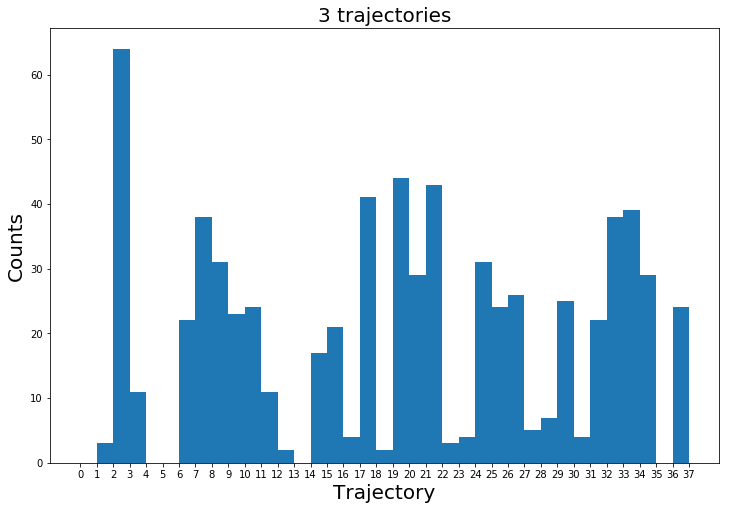

In [246]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(12,8))
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)

data = np.concatenate( [ np.array(goodUnique3['t1']), np.array(goodUnique3['t2']), np.array(goodUnique3['t3']) ] )
counts, bins = np.histogram(data, bins = [i for i in range(38)])
plt.xticks([i for i in range(38)])

plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Trajectory')
plt.ylabel('Counts')
plt.title('3 trajectories')
plt.savefig("freqTraj3.jpg")
plt.show()

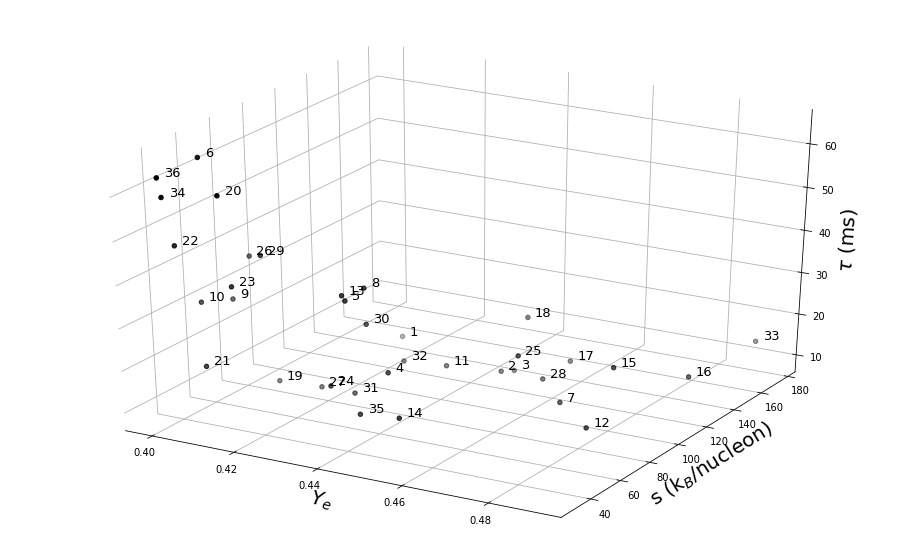

In [215]:
from mpl_toolkits import mplot3d

Ye = [0.42, 0.45, 0.45, 0.44, 0.43, 0.40, 0.47, 0.43, 0.40,
      0.40, 0.44, 0.48, 0.43, 0.45, 0.48, 0.49, 0.46, 0.45,
      0.41, 0.41, 0.41, 0.40, 0.41, 0.43, 0.46, 0.40, 0.42,
      0.46, 0.41, 0.43, 0.43, 0.43 ,0.49,
      0.40, 0.44, 0.40]

s = [129, 113, 122, 66, 66, 56, 96, 78, 73, 54, 104,
     85, 64, 46, 103, 126, 132, 131, 75, 42, 31, 40,
     48, 56, 96, 84, 76, 113, 66, 79, 71, 103, 175, 34,
     48, 32]

tau = [11.7, 11.9, 10.3, 19.2, 34.3, 63.8, 11.6, 35, 28.1, 31,
       13.2, 9.7, 35.9, 14.4, 20.4, 15.4, 12.4, 21.4, 9.8, 59.3,
       22.2, 46.7, 37.5, 16.2, 20.9,  36.2, 10, 11.9, 41.4,
       26.3, 11.4, 12.7, 14.2, 58.7, 13, 63.4]

names = np.array(['1','2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30' ,'31', '32',
                  '33', '34', '35', '36'])

fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')

ax.scatter3D(Ye, s, tau, color= 'black');

ax.set_ylabel('s (k$_B$/nucleon)')
ax.set_xlabel('$Y_e$')
ax.set_zlabel('$\\tau$ (ms)')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
for i in range(len(names)):
      ax.text(Ye[i]+0.001, s[i]+2, tau[i]+0.001, names[i], fontsize=13)


plt.show()

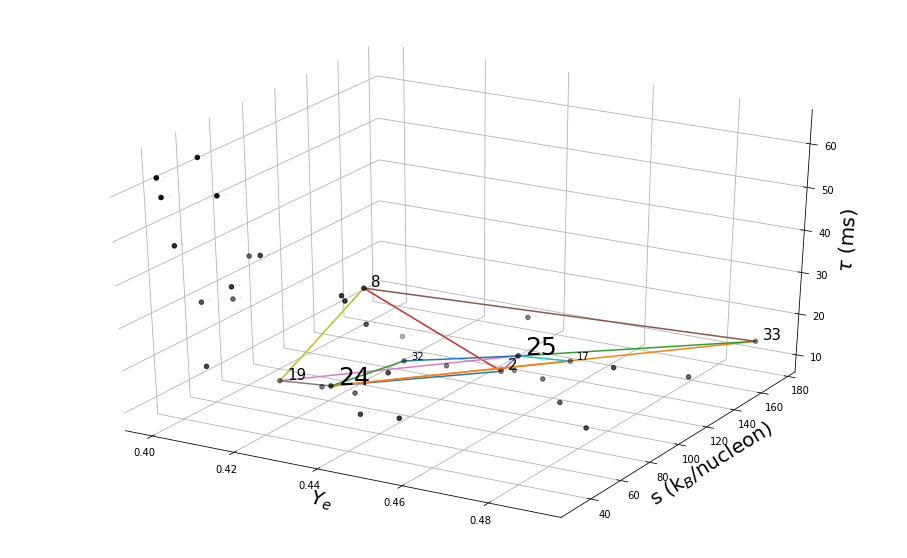

In [245]:
# 2-trajectory combinations

from mpl_toolkits import mplot3d

Ye = [0.42, 0.45, 0.45, 0.44, 0.43, 0.40, 0.47, 0.43, 0.40,
      0.40, 0.44, 0.48, 0.43, 0.45, 0.48, 0.49, 0.46, 0.45,
      0.41, 0.41, 0.41, 0.40, 0.41, 0.43, 0.46, 0.40, 0.42,
      0.46, 0.41, 0.43, 0.43, 0.43 ,0.49,
      0.40, 0.44, 0.40]

s = [129, 113, 122, 66, 66, 56, 96, 78, 73, 54, 104,
     85, 64, 46, 103, 126, 132, 131, 75, 42, 31, 40,
     48, 56, 96, 84, 76, 113, 66, 79, 71, 103, 175, 34,
     48, 32]

tau = [11.7, 11.9, 10.3, 19.2, 34.3, 63.8, 11.6, 35, 28.1, 31,
       13.2, 9.7, 35.9, 14.4, 20.4, 15.4, 12.4, 21.4, 9.8, 59.3,
       22.2, 46.7, 37.5, 16.2, 20.9,  36.2, 10, 11.9, 41.4,
       26.3, 11.4, 12.7, 14.2, 58.7, 13, 63.4]

names = np.array(['1','2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30' ,'31', '32',
                  '33', '34', '35', '36'])

fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')

ax.scatter3D(Ye, s, tau, color= 'black');

for i in range( len(good2) ):
    t1 = int(good2.loc[i,'t1']) - 1
    t2 = int(good2.loc[i,'t2']) - 1
    ax.plot3D([Ye[t1], Ye[t2]], [s[t1], s[t2]], [tau[t1], tau[t2]])

ax.set_ylabel('s (k$_B$/nucleon)')
ax.set_xlabel('$Y_e$')
ax.set_zlabel('$\\tau$ (ms)')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
for i in range(len(names)):
      #ax.text(Ye[i]+0.001, s[i]+2, tau[i]+0.001, names[i], fontsize=13)
    ax.text(Ye[i]+0.001, s[i]+2, tau[i]+0.001, names[i], fontsize=5*counts[i+1])

plt.show()

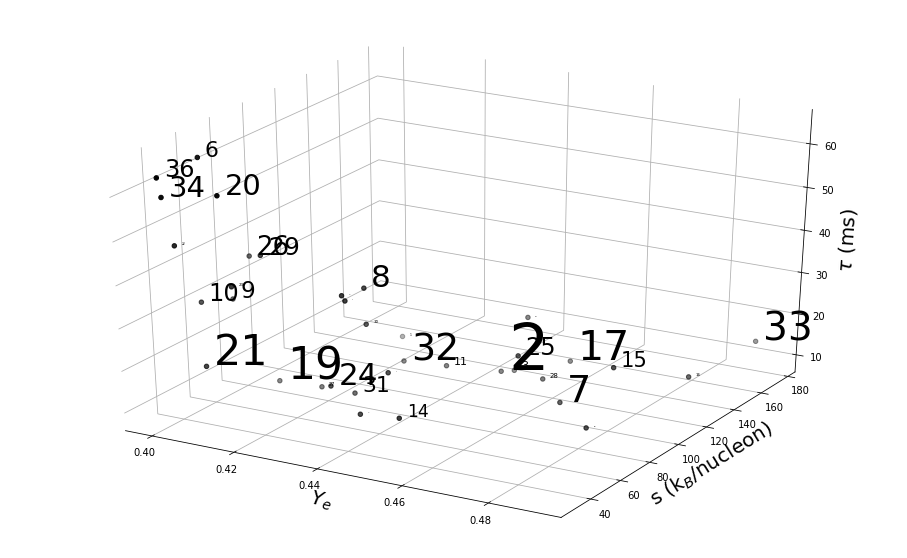

In [248]:
# 3-trajectory combinations

from mpl_toolkits import mplot3d

Ye = [0.42, 0.45, 0.45, 0.44, 0.43, 0.40, 0.47, 0.43, 0.40,
      0.40, 0.44, 0.48, 0.43, 0.45, 0.48, 0.49, 0.46, 0.45,
      0.41, 0.41, 0.41, 0.40, 0.41, 0.43, 0.46, 0.40, 0.42,
      0.46, 0.41, 0.43, 0.43, 0.43 ,0.49,
      0.40, 0.44, 0.40]

s = [129, 113, 122, 66, 66, 56, 96, 78, 73, 54, 104,
     85, 64, 46, 103, 126, 132, 131, 75, 42, 31, 40,
     48, 56, 96, 84, 76, 113, 66, 79, 71, 103, 175, 34,
     48, 32]

tau = [11.7, 11.9, 10.3, 19.2, 34.3, 63.8, 11.6, 35, 28.1, 31,
       13.2, 9.7, 35.9, 14.4, 20.4, 15.4, 12.4, 21.4, 9.8, 59.3,
       22.2, 46.7, 37.5, 16.2, 20.9,  36.2, 10, 11.9, 41.4,
       26.3, 11.4, 12.7, 14.2, 58.7, 13, 63.4]

names = np.array(['1','2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30' ,'31', '32',
                  '33', '34', '35', '36'])

fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')

ax.scatter3D(Ye, s, tau, color= 'black');

for i in range( len(goodUnique3) ):
    t1 = int(goodUnique3.loc[i,'t1']) - 1
    t2 = int(goodUnique3.loc[i,'t2']) - 1
    t3 = int(goodUnique3.loc[i,'t3']) - 1
    #ax.plot3D([Ye[t1], Ye[t2], Ye[t3]], [s[t1], s[t2], s[t3]], [tau[t1], tau[t2], tau[t3]])

ax.set_ylabel('s (k$_B$/nucleon)')
ax.set_xlabel('$Y_e$')
ax.set_zlabel('$\\tau$ (ms)')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
for i in range(len(names)):
      #ax.text(Ye[i]+0.001, s[i]+2, tau[i]+0.001, names[i], fontsize=13)
    ax.text(Ye[i]+0.001, s[i]+2, tau[i]+0.001, names[i], fontsize=counts[i+1])

plt.show()

In [249]:
# Table with good fits to weak r-process star

# 4 trajectory combinations

import numpy as np
import pandas as pd

# load dict of arrays
dict_data = np.load('conditions-4.npz')
# extract the first array
choices = dict_data['arr_0']
coeffs = dict_data['arr_1']
score = dict_data['arr_2']

data = []
for i in range(len(choices)):    
    data.append( np.append(np.array([choices[i]+1, coeffs[i]/np.sum(coeffs[i])]).reshape(-1), score[i]) )
data = np.asarray(data).reshape(len(choices),9)

data4traj = pd.DataFrame(data)
data4traj[data4traj[8] < 1]

,0,1,2,3,4,5,6,7,8
0,2.0,6.0,7.0,33.0,0.036817,0.015928,0.858043,0.089213,0.066179
1,2.0,6.0,7.0,19.0,0.043379,0.016739,0.933847,0.006035,0.068445
2,2.0,6.0,7.0,32.0,0.044926,0.016814,0.930973,0.007286,0.071482
3,2.0,6.0,7.0,17.0,0.044246,0.016808,0.923890,0.015057,0.072818
4,2.0,3.0,6.0,7.0,0.048225,0.008514,0.016875,0.926385,0.089082
5,2.0,6.0,21.0,33.0,0.153704,0.062276,0.343979,0.440040,0.093168
6,2.0,6.0,19.0,21.0,0.284149,0.099261,0.043846,0.572744,0.099895
7,1.0,2.0,6.0,7.0,0.005127,0.051547,0.016782,0.926544,0.100820
8,2.0,6.0,21.0,32.0,0.288312,0.098012,0.560442,0.053234,0.102589
9,2.0,6.0,17.0,21.0,0.270142,0.093642,0.105624,0.530592,0.102991


In [338]:
# 4-trajectories-iterations that do not come from 2 or 3-trajectories-iterations
good2 = data2traj[data2traj[4] < 1]   # 2-trajectories-iterations with low chi2
good3 = data3traj[data3traj[6] < 1]   # 3-trajectories-iterations with low chi2
good4 = data4traj[data4traj[8] < 1]   # 3-trajectories-iterations with low chi2

uniqueThres = 0.9 # not used for now....

goodUnique4 = pd.DataFrame()

for i in range( len(good4) ):
    existsIn2 = False # Is in 2-trajectory or not?
    existsIn3 = False # Is in 3-trajectory or not?
    j = 0
    while not existsIn2 and j < len(good2):
        if np.sum(np.isin(np.array(good2.loc[j,0:1]), np.array(good4.loc[i,0:3])))==2:
            existsIn2 = True
        j = j + 1
    if not existsIn2 :
        j = 0
        while not existsIn3 and j < len(goodUnique3):
            if np.sum(np.isin(np.array(goodUnique3.iloc[j,0:2]), np.array(good4.loc[i,0:3])))==3:
                existsIn3 = True
            j = j + 1
    if existsIn2 == False and existsIn3 == False:
        goodUnique4 = goodUnique4.append([good4.loc[i]], ignore_index=True)

goodUnique4.columns =['t1', 't2', 't3', 't4', 'w1', 'w2', 'w3', 'w4', 'chi2']
goodUnique4

,t1,t2,t3,t4,w1,w2,w3,w4,chi2
0,2.0,6.0,7.0,33.0,0.036817,0.015928,0.858043,0.089213,0.066179
1,2.0,6.0,7.0,19.0,0.043379,0.016739,0.933847,0.006035,0.068445
2,2.0,6.0,7.0,32.0,0.044926,0.016814,0.930973,0.007286,0.071482
3,2.0,6.0,7.0,17.0,0.044246,0.016808,0.923890,0.015057,0.072818
4,2.0,3.0,6.0,7.0,0.048225,0.008514,0.016875,0.926385,0.089082
5,2.0,6.0,21.0,33.0,0.153704,0.062276,0.343979,0.440040,0.093168
6,2.0,6.0,19.0,21.0,0.284149,0.099261,0.043846,0.572744,0.099895
7,1.0,2.0,6.0,7.0,0.005127,0.051547,0.016782,0.926544,0.100820
8,2.0,6.0,21.0,32.0,0.288312,0.098012,0.560442,0.053234,0.102589
9,2.0,6.0,17.0,21.0,0.270142,0.093642,0.105624,0.530592,0.102991


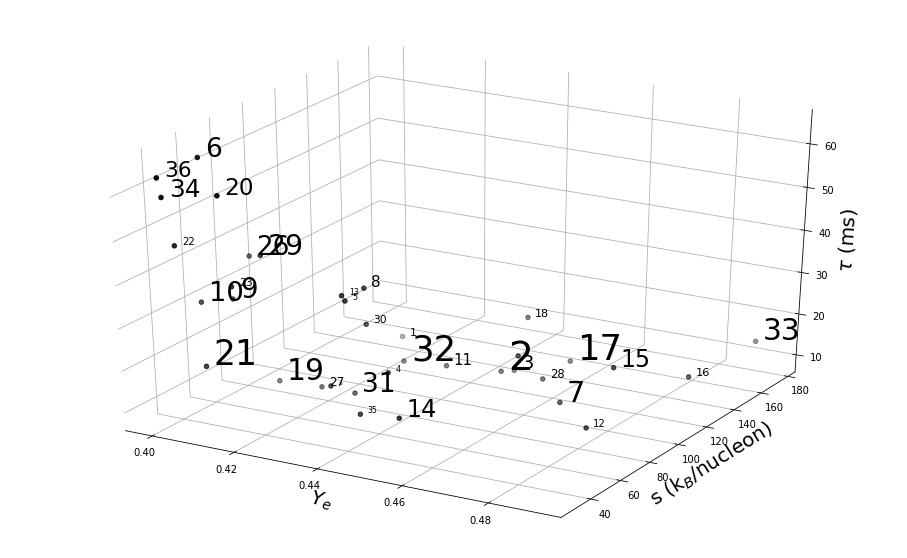

In [346]:
# 4-trajectory combinations

from mpl_toolkits import mplot3d

Ye = [0.42, 0.45, 0.45, 0.44, 0.43, 0.40, 0.47, 0.43, 0.40,
      0.40, 0.44, 0.48, 0.43, 0.45, 0.48, 0.49, 0.46, 0.45,
      0.41, 0.41, 0.41, 0.40, 0.41, 0.43, 0.46, 0.40, 0.42,
      0.46, 0.41, 0.43, 0.43, 0.43 ,0.49,
      0.40, 0.44, 0.40]

s = [129, 113, 122, 66, 66, 56, 96, 78, 73, 54, 104,
     85, 64, 46, 103, 126, 132, 131, 75, 42, 31, 40,
     48, 56, 96, 84, 76, 113, 66, 79, 71, 103, 175, 34,
     48, 32]

tau = [11.7, 11.9, 10.3, 19.2, 34.3, 63.8, 11.6, 35, 28.1, 31,
       13.2, 9.7, 35.9, 14.4, 20.4, 15.4, 12.4, 21.4, 9.8, 59.3,
       22.2, 46.7, 37.5, 16.2, 20.9,  36.2, 10, 11.9, 41.4,
       26.3, 11.4, 12.7, 14.2, 58.7, 13, 63.4]

names = np.array(['1','2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30' ,'31', '32',
                  '33', '34', '35', '36'])

fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')

ax.scatter3D(Ye, s, tau, color= 'black');

ax.set_ylabel('s (k$_B$/nucleon)')
ax.set_xlabel('$Y_e$')
ax.set_zlabel('$\\tau$ (ms)')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

data = np.concatenate( [ np.array(goodUnique4['t1']), np.array(goodUnique4['t2']), np.array(goodUnique4['t3']), np.array(goodUnique4['t4']) ] )
counts, bins = np.histogram(data, bins = [i for i in range(38)])

for i in range(len(names)):
    ax.text(Ye[i]+0.001, s[i]+2, tau[i]+0.001, names[i], fontsize=counts[i+1]/30)

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


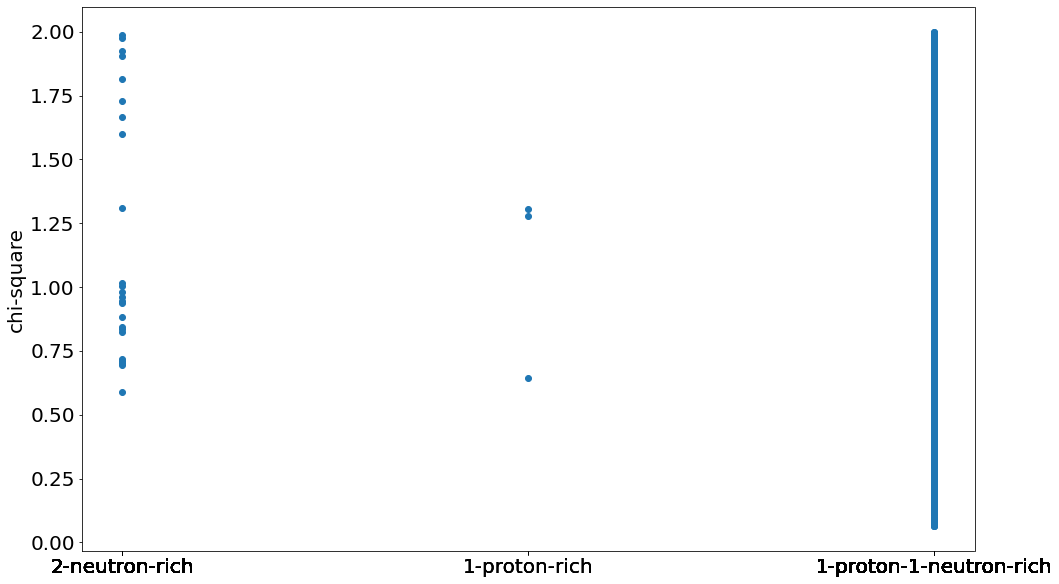

In [79]:
# Best chi-squares

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def chiSq(nameFile, pos, label):
    if pos == 2: # 1-proton-rich combinations
        cspos = 3
    else:
        cspos = 5
    
    # load dict of arrays
    dict_data = np.load(nameFile)
    # extract the first array
    choices = dict_data['arr_0']
    coeffs = dict_data['arr_1']
    score = dict_data['arr_2']

    data = []
    for i in range(len(choices)):    
        data.append( np.append(np.array([choices[i]+1, coeffs[i]/np.sum(coeffs[i])]).reshape(-1), score[i]) )
    data = np.asarray(data).reshape(len(choices),cspos)

    combinations = pd.DataFrame(data)
    y = np.asarray(combinations[combinations[cspos-1]<2][cspos-1])
    x = np.asarray([pos for _ in range(len(y))])
    xticks = np.asarray([label for _ in range(len(y))])

    return x, y, xticks

x, y, xticks = chiSq('Datasets/Astro-conditions/Results-neutron-rich/2-neutron-HD122563.npz', 1, "2-neutron-rich")
xTotal = x
yTotal = y
xticksTotal = xticks
x, y, xticks = chiSq('Datasets/Astro-conditions/Results-proton-rich/1-proton-HD122563.npz', 2, "1-proton-rich")
xTotal = np.concatenate([xTotal, x])
yTotal = np.concatenate([yTotal, y])
xticksTotal = np.concatenate([xticksTotal, xticks])
x, y, xticks = chiSq('Datasets/Astro-conditions/Results-proton+neutron-rich/1-proton-1-neutron-HD122563.npz', 3, "1-proton-1-neutron-rich")
xTotal = np.concatenate([xTotal, x])
yTotal = np.concatenate([yTotal, y])
xticksTotal = np.concatenate([xticksTotal, xticks])

plt.figure(figsize=(16,10))
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('font', size=20) 
plt.scatter(xTotal, yTotal)
plt.xticks(xTotal, xticksTotal)
plt.ylabel('chi-square')
plt.savefig('chisquare.pdf')
plt.show()